## Análisis Exploratorio de Datos - Propensión de Compra

## Importación de librerías.

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import numpy as np
import re
from tabulate import tabulate
from sklearn.cluster import KMeans
import os
from urllib.parse import urlparse
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    precision_score,
    recall_score,
)

## Importación e información del dataframe

In [4]:
df = pd.read_csv('data/raw/Propensity.csv', delimiter=',', index_col=0)

In [5]:
# Número de filas y columnas
print(df.shape)  

(58049, 23)


In [6]:
# Primeras filas del DataFrame
df.head()

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,Asturias,...,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,Toledo,...,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0
CLI3,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,Lerida,...,Medio,NO DATA,No,NO,1376,0,True,4,21,3
CLI4,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Empresa,Madrid,...,Medio,SI,Averia muy grave,SI,2015,7256,True,4,48,5
CLI5,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Funcionario,Santa Cruz de Tenerife,...,Alto,NO DATA,No,NO,1818,0,True,3,21,3


In [7]:

df.dtypes

PRODUCTO           object
TIPO_CARROCERIA    object
COMBUSTIBLE        object
Potencia           object
TRANS              object
FORMA_PAGO         object
ESTADO_CIVIL       object
GENERO             object
OcupaciOn          object
PROVINCIA          object
Campanna1          object
Campanna2          object
Campanna3          object
Zona_Renta         object
REV_Garantia       object
Averia_grave       object
QUEJA_CAC          object
COSTE_VENTA         int64
km_anno             int64
Mas_1_coche          bool
Revisiones          int64
Edad_Cliente        int64
Tiempo              int64
dtype: object

In [8]:
df.columns

Index(['PRODUCTO', 'TIPO_CARROCERIA', 'COMBUSTIBLE', 'Potencia', 'TRANS',
       'FORMA_PAGO', 'ESTADO_CIVIL', 'GENERO', 'OcupaciOn', 'PROVINCIA',
       'Campanna1', 'Campanna2', 'Campanna3', 'Zona_Renta', 'REV_Garantia',
       'Averia_grave', 'QUEJA_CAC', 'COSTE_VENTA', 'km_anno', 'Mas_1_coche',
       'Revisiones', 'Edad_Cliente', 'Tiempo'],
      dtype='object')

### Descripción de las Variables del Dataset

| **Variable**      | **Descripción** |
|------------------|------------------------------------------------|
| `CODE`          | Código único del cliente. |
| `PRODUCTO`      | Modelo de coche adquirido. |
| `TIPO_CARROCERIA` | Tipo de carrocería del coche (SUV, Sedán, etc.). |
| `COMBUSTIBLE`   | Tipo de combustible utilizado (Gasolina, Diésel, etc.). |
| `Potencia`      | Potencia del coche en caballos de fuerza. |
| `TRANS`         | Tipo de transmisión (Manual o Automática). |
| `FORMA_PAGO`    | Método de pago (Financiado o Contado). |
| `ESTADO_CIVIL`  | Estado civil del cliente al momento de la compra. |
| `GENERO`        | Género del cliente (Masculino o Femenino). |
| `OcupaciOn`     | Ocupación del cliente en el momento de la compra. |
| `PROVINCIA`     | Provincia de residencia del cliente. |
| `Campanna1`     | Si el cliente recibió un descuento por financiar (Sí/No). |
| `Campanna2`     | Si el cliente recibió un descuento por adquirir un seguro (Sí/No). |
| `Campanna3`     | Si el cliente recibió un descuento por extender la garantía (Sí/No). |
| `Zona_Renta`    | Nivel de renta promedio en la zona de residencia del cliente. |
| `REV_Garantia`  | Si el coche sigue en garantía. |
| `Averia_grave`  | Si el coche ha tenido una avería grave y de qué tipo. |
| `QUEJA_CAC`     | Si el cliente ha contactado con atención al cliente por alguna queja. |
| `COSTE_VENTA`   | Suma de descuentos aplicados en la venta. |
| `km_anno`       | Kilometraje medio recorrido por el coche al año. |
| `Mas_1_coche`   | Indica si el cliente ha comprado más de un coche. |
| `Revisiones`    | Número de revisiones pasadas del coche. |
| `Edad_Cliente`  | Edad actual del cliente. |
| `Tiempo`        | Años transcurridos entre compras de coches por el cliente. |



In [9]:
df.describe(include='all')

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
count,58049,58049,58049,58049,58049,58049,57159,57189,58049,58049,...,44871,58049,58048,58049,58049.000000,58049.000000,58049,58049.000000,58049.000000,58049.000000
unique,11,8,2,3,2,4,4,2,3,53,...,4,2,4,2,NaN,NaN,2,NaN,NaN,NaN
top,B,TIPO1,FUEL 2,Media,M,Contado,CASADO,M,Empresa,Madrid,...,Alto,NO DATA,No,NO,NaN,NaN,False,NaN,NaN,NaN
freq,15993,23387,33085,39906,52969,30190,43529,40170,53262,10874,...,17152,32011,29935,36268,NaN,NaN,41107,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2540.125756,11805.893607,NaN,3.529587,47.351255,1.859119
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1603.556511,10205.363971,NaN,2.528413,11.239984,3.091309
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,18.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1595.000000,0.000000,NaN,1.000000,40.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2353.000000,11486.000000,NaN,3.000000,48.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3301.000000,17927.000000,NaN,5.000000,56.000000,4.000000


### Limpieza de datos.

El dataset cuenta con un total de 24 columnas que debemos analizar para determinar cuáles serán relevantes en nuestro estudio. Para ello, es importante comprender el significado de cada una de ellas y su posible impacto en el análisis.

#### Manejo de filas duplicadas.

En caso de haber filas duplicadas, deberemos de eliminar estas para que no afecten al análisis posterior.

In [10]:
df.duplicated().sum() # Columnas duplicadas

np.int64(144)

In [11]:
df.drop_duplicates(inplace=True)

#### Manejo de filas nulas.

In [12]:
df.isnull().sum() # Valores nulos

PRODUCTO               0
TIPO_CARROCERIA        0
COMBUSTIBLE            0
Potencia               0
TRANS                  0
FORMA_PAGO             0
ESTADO_CIVIL         890
GENERO               860
OcupaciOn              0
PROVINCIA              0
Campanna1              0
Campanna2              0
Campanna3              0
Zona_Renta         13064
REV_Garantia           0
Averia_grave           1
QUEJA_CAC              0
COSTE_VENTA            0
km_anno                0
Mas_1_coche            0
Revisiones             0
Edad_Cliente           0
Tiempo                 0
dtype: int64

In [13]:
df.shape[0]

57905

In [14]:
df.dropna(subset=['Averia_grave'], inplace=True)

In [15]:
# Rellenar valores faltantes con la moda
for i in ['ESTADO_CIVIL', 'GENERO']:
    df[i] = df[i].fillna(df[i].mode()[0])

### Selección de variables categóricas y continuas.


Para realizar correctamente un ánalisis de datos debemos de distinguir entre las variables categóricas, variables que representan diferentes categorías o grupos, y continuas, variables que pueden tomar cualquier valor dentro de un rango determinado.

In [16]:
v_continuas = []
v_categoricas = []

for col in df.columns:
    if df[col].dtype in ['int64', 'float64', 'bool']:  # Variables numéricas y booleanas como continuas
        v_continuas.append(col)
    else:
        v_categoricas.append(col)

print('Variables continuas:', ', '.join(v_continuas))
print('Variables categóricas:', ', '.join(v_categoricas))


Variables continuas: COSTE_VENTA, km_anno, Mas_1_coche, Revisiones, Edad_Cliente, Tiempo
Variables categóricas: PRODUCTO, TIPO_CARROCERIA, COMBUSTIBLE, Potencia, TRANS, FORMA_PAGO, ESTADO_CIVIL, GENERO, OcupaciOn, PROVINCIA, Campanna1, Campanna2, Campanna3, Zona_Renta, REV_Garantia, Averia_grave, QUEJA_CAC


Variables continuas (v_continuas):

Columnas numéricas (int64, float64), ya que representan cantidades medibles.
También incluyo las booleanas (bool), ya que pueden ser tratadas como binarias (0/1).

Variables categóricas (v_categoricas):

Columnas de tipo object, que son datos no numéricos como nombres de productos, tipo de combustible, etc.

#### Tratamiento de variables categóricas.

Para el posterior modelo de clasificación, necesitamos codificar nuestras variables object. Para ello, realizaremos una codificación ordinal que consiste en asignar valores enteros a las categorias basándose en su posición o jerarquía en los datos.

In [17]:
df[v_categoricas].nunique()

PRODUCTO           11
TIPO_CARROCERIA     8
COMBUSTIBLE         2
Potencia            3
TRANS               2
FORMA_PAGO          4
ESTADO_CIVIL        4
GENERO              2
OcupaciOn           3
PROVINCIA          53
Campanna1           2
Campanna2           2
Campanna3           2
Zona_Renta          4
REV_Garantia        2
Averia_grave        4
QUEJA_CAC           2
dtype: int64

In [18]:
df[v_categoricas].head(3)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,Campanna1,Campanna2,Campanna3,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC
CODE,,,,,,,,,,,,,,,,,
CLI1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,Asturias,SI,NO,NO,Medio-Bajo,NO DATA,Averia muy grave,SI
CLI2,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,Toledo,NO,NO,NO,Medio-Bajo,SI,No,NO
CLI3,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,Lerida,NO,NO,NO,Medio,NO DATA,No,NO


In [19]:
df[v_categoricas].describe()

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,Campanna1,Campanna2,Campanna3,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC
count,57904,57904,57904,57904,57904,57904,57904,57904,57904,57904,57904,57904,57904,44840,57904,57904,57904
unique,11,8,2,3,2,4,4,2,3,53,2,2,2,4,2,4,2
top,B,TIPO1,FUEL 2,Media,M,Contado,CASADO,M,Empresa,Madrid,NO,NO,NO,Alto,NO DATA,No,NO
freq,15982,23359,33012,39807,52830,30147,44284,40913,53118,10809,37348,50968,51019,17140,31867,29796,36128


**PRODUCTO.**

In [20]:
df['PRODUCTO'].unique()

array(['A', 'B', 'C', 'H', 'J', 'D', 'I', 'E', 'F', 'K', 'G'],
      dtype=object)

In [21]:
label_encoder = LabelEncoder()
df['PRODUCTO'] = label_encoder.fit_transform(df['PRODUCTO'])

In [22]:
df.head(2)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,Asturias,...,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,0,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,Toledo,...,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0


**TIPO_CARROCERIA.**

In [23]:
df['TIPO_CARROCERIA'].unique()

array(['TIPO1', 'TIPO6', 'TIPO4', 'TIPO7', 'TIPO8', 'TIPO2', 'TIPO3',
       'TIPO5'], dtype=object)

In [24]:
label_encoder = LabelEncoder()
df['TIPO_CARROCERIA'] = label_encoder.fit_transform(df['TIPO_CARROCERIA'])

In [25]:
df.head(2)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,0,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,Asturias,...,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,0,0,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,Toledo,...,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0


**COMBUSTIBLE.**

In [26]:
df['COMBUSTIBLE'].unique()

array(['FUEL 1', 'FUEL 2'], dtype=object)

In [27]:
label_encoder = LabelEncoder()
df['COMBUSTIBLE'] = label_encoder.fit_transform(df['COMBUSTIBLE'])

In [28]:
df.head(2)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,0,0,Baja,M,Contado,CASADO,M,Empresa,Asturias,...,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,0,0,0,Baja,M,Contado,CASADO,F,Empresa,Toledo,...,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0


**Potencia.**

Se utilizará OrdinalEncoder en las variables que presentan un orden lógico en sus categorías:
Potencia: Baja < Media < Alta.
Zona_Renta: Medio-Bajo < Medio < Alto < Otros.
Averia_grave: No < Averia leve < Averia grave < Averia muy grave.
Para el resto de las variables categóricas, que no tienen un orden inherente, se aplicará LabelEncoder, asegurando que cada categoría sea representada por un valor numérico sin introducir una jerarquía artificial.

In [29]:
# Definición del orden lógico de las variables ordinales.
#ordinal_cols = {
   # "Potencia": ["Baja", "Media", "Alta"],
#}
## "Zona_Renta": ["Otros", "Medio-Bajo", "Medio", "Alto"],
##    "Averia_grave": ["No", "Averia leve", "Averia grave", "Averia muy grave"]

In [30]:
#ordinal_encoder = OrdinalEncoder(categories=[ordinal_cols[col] for col in ordinal_cols])
#df[list(ordinal_cols.keys())] = ordinal_encoder.fit_transform(df[list(ordinal_cols.keys())])

In [31]:
orden_correcto = ["Baja", "Media", "Alta"]
encoder = OrdinalEncoder(categories=[orden_correcto])
df["Potencia"] = encoder.fit_transform(df[["Potencia"]])

In [32]:
cols = df.columns.tolist()
indice_potencia = cols.index("Potencia")
cols.insert(indice_potencia + 1, cols.pop(cols.index("Potencia")))
df = df[cols]

In [33]:
df.head(2)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,TRANS,Potencia,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,0,0,M,0.0,Contado,CASADO,M,Empresa,Asturias,...,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,0,0,0,M,0.0,Contado,CASADO,F,Empresa,Toledo,...,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0


**TRANS.**

In [34]:
df['TRANS'].unique()

array(['M', 'A'], dtype=object)

In [35]:
label_encoder = LabelEncoder()
df['TRANS'] = label_encoder.fit_transform(df['TRANS'])

In [36]:
df.head(2)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,TRANS,Potencia,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,0,0,1,0.0,Contado,CASADO,M,Empresa,Asturias,...,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,0,0,0,1,0.0,Contado,CASADO,F,Empresa,Toledo,...,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0


**FORMA_PAGO.**

In [37]:
df['FORMA_PAGO'].unique()

array(['Contado', 'Otros', 'Financiera Marca', 'Financiera Banco'],
      dtype=object)

In [38]:
label_encoder = LabelEncoder()
df['FORMA_PAGO'] = label_encoder.fit_transform(df['FORMA_PAGO'])

In [39]:
df.head(2)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,TRANS,Potencia,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,0,0,1,0.0,0,CASADO,M,Empresa,Asturias,...,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,0,0,0,1,0.0,0,CASADO,F,Empresa,Toledo,...,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0


**ESTADO_CIVIL.**

In [40]:
df['ESTADO_CIVIL'].unique()

array(['CASADO', 'SOLTERO', 'OTROS', 'EN PAREJA'], dtype=object)

In [41]:
label_encoder = LabelEncoder()
df['ESTADO_CIVIL'] = label_encoder.fit_transform(df['ESTADO_CIVIL'])

In [42]:
df.head(2)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,TRANS,Potencia,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,0,0,1,0.0,0,0,M,Empresa,Asturias,...,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,0,0,0,1,0.0,0,0,F,Empresa,Toledo,...,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0


**GENERO.**

In [43]:
df['GENERO'].unique()

array(['M', 'F'], dtype=object)

In [44]:
label_encoder = LabelEncoder()
df['GENERO'] = label_encoder.fit_transform(df['GENERO'])

In [45]:
df.head(2)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,TRANS,Potencia,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,0,0,1,0.0,0,0,1,Empresa,Asturias,...,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,0,0,0,1,0.0,0,0,0,Empresa,Toledo,...,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0


**OcupaciOn.**

In [46]:
df['OcupaciOn'].unique()

array(['Empresa', 'Funcionario', 'Autonomo'], dtype=object)

In [47]:
label_encoder = LabelEncoder()
df['OcupaciOn'] = label_encoder.fit_transform(df['OcupaciOn'])

In [48]:
df.head(2)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,TRANS,Potencia,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,0,0,1,0.0,0,0,1,1,Asturias,...,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,0,0,0,1,0.0,0,0,0,1,Toledo,...,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0


**PROVINCIA.**

In [49]:
df['PROVINCIA'].unique()

array(['Asturias', 'Toledo', 'Lerida', 'Madrid', 'Santa Cruz de Tenerife',
       'Pontevedra', 'Lacoruna', 'Barcelona', 'Cordoba', 'Guipuzcua',
       'Valladolid', 'Castellon', 'Valencia', 'Las Palmas', 'La Rioja',
       'Baleares', 'Zaragoza', 'Alicante', 'Tarragona', 'Leon', 'Lugo',
       'Badajoz', 'Vizcaya', 'Sevilla', 'Guadalajara', 'Ciudad Real',
       'Cantabria', 'Orense', 'Navarra', 'Gerona', 'Malaga', 'Jaen',
       'Murcia', 'Burgos', 'Granada', 'Alava', 'Cuenca', 'Cadiz',
       'Salamanca', 'Albacete', 'Almeria', 'Teruel', 'Segovia',
       'Palencia', 'Huelva', 'Huesca', 'Zamora', 'Avila', 'Soria',
       'Caceres', 'Melilla', 'Ceuta', 'Francia'], dtype=object)

In [50]:
label_encoder = LabelEncoder()
df['PROVINCIA'] = label_encoder.fit_transform(df['PROVINCIA'])

In [51]:
df.head(2)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,TRANS,Potencia,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,0,0,1,0.0,0,0,1,1,4,...,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,0,0,0,1,0.0,0,0,0,1,47,...,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0


**Campanna1, Campanna2, Campanna3.**

In [52]:
df[['Campanna1', 'Campanna2', 'Campanna3']].apply(pd.Series.unique)

,Campanna1,Campanna2,Campanna3
0,SI,NO,NO
1,NO,SI,SI


In [53]:
label_encoder = LabelEncoder()

for col in ['Campanna1', 'Campanna2', 'Campanna3']:
    df[f'{col}'] = label_encoder.fit_transform(df[col])

In [54]:
label_encoder = LabelEncoder()

for col in ['Campanna1', 'Campanna2', 'Campanna3']:
    df[f'{col}'] = label_encoder.fit_transform(df[col])
    cols = df.columns.tolist()
    disclosure_index = cols.index(col)
    cols.insert(disclosure_index + 1, cols.pop(cols.index(f'{col}')))
    df = df[cols]

In [55]:
df.head(2)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,TRANS,Potencia,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Campanna3,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,0,0,1,0.0,0,0,1,1,4,...,0,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,0,0,0,1,0.0,0,0,0,1,47,...,0,SI,No,NO,1376,7187,False,2,53,0


**Zona_Renta**                                .... COMPROBAR LO DE OTROS Q ES?

In [56]:
df["Zona_Renta"] = df["Zona_Renta"].fillna("Desconocido")

In [57]:
df['Zona_Renta'].unique()

array(['Medio-Bajo', 'Medio', 'Alto', 'Desconocido', 'Otros'],
      dtype=object)

In [58]:
orden_correcto = ["Medio-Bajo", "Medio", "Alto", "Otros", "Desconocido"]
encoder = OrdinalEncoder(categories=[orden_correcto])
df["Zona_Renta"] = encoder.fit_transform(df[["Zona_Renta"]])

In [59]:
cols = df.columns.tolist()
indice_potencia = cols.index("Zona_Renta")
cols.insert(indice_potencia + 1, cols.pop(cols.index("Zona_Renta")))
df = df[cols]

In [60]:
df.head(2)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,TRANS,Potencia,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,0,0,1,0.0,0,0,1,1,4,...,0.0,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,0,0,0,1,0.0,0,0,0,1,47,...,0.0,SI,No,NO,1376,7187,False,2,53,0


**REV_Garantia**

In [61]:
df['REV_Garantia'].unique()

array(['NO DATA', 'SI'], dtype=object)

In [62]:
label_encoder = LabelEncoder()
df['REV_Garantia'] = label_encoder.fit_transform(df['REV_Garantia'])

In [63]:
df.head(2)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,TRANS,Potencia,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,0,0,1,0.0,0,0,1,1,4,...,0.0,0,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,0,0,0,1,0.0,0,0,0,1,47,...,0.0,1,No,NO,1376,7187,False,2,53,0


**Averia_grave**   ..

In [64]:
df['Averia_grave'].unique()

array(['Averia muy grave', 'No', 'Averia leve', 'Averia grave'],
      dtype=object)

In [65]:
label_encoder = LabelEncoder()
df['Averia_grave'] = label_encoder.fit_transform(df['Averia_grave'])

In [66]:
df.head(2)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,TRANS,Potencia,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,0,0,1,0.0,0,0,1,1,4,...,0.0,0,2,SI,2892,0,False,2,18,0
CLI2,0,0,0,1,0.0,0,0,0,1,47,...,0.0,1,3,NO,1376,7187,False,2,53,0


**QUEJA_CAC**

In [67]:
df['QUEJA_CAC'].unique()

array(['SI', 'NO'], dtype=object)

In [68]:
label_encoder = LabelEncoder()
df['QUEJA_CAC'] = label_encoder.fit_transform(df['QUEJA_CAC'])

In [69]:
df.head(2)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,TRANS,Potencia,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,0,0,1,0.0,0,0,1,1,4,...,0.0,0,2,1,2892,0,False,2,18,0
CLI2,0,0,0,1,0.0,0,0,0,1,47,...,0.0,1,3,0,1376,7187,False,2,53,0


#### Tratamiento de variables continuas.

In [70]:
df[v_continuas].nunique()

COSTE_VENTA      2833
km_anno         21511
Mas_1_coche         2
Revisiones         14
Edad_Cliente       54
Tiempo             14
dtype: int64

In [71]:
df[v_continuas].head(3)

,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,
CLI1,2892,0,False,2,18,0
CLI2,1376,7187,False,2,53,0
CLI3,1376,0,True,4,21,3


In [72]:
df[v_continuas].describe()

,COSTE_VENTA,km_anno,Revisiones,Edad_Cliente,Tiempo
count,57904.000000,57904.000000,57904.000000,57904.000000,57904.000000
mean,2540.657416,11832.042847,3.535559,47.362255,1.862497
std,1605.129977,10201.406504,2.527840,11.225932,3.093356
min,0.000000,0.000000,0.000000,18.000000,0.000000
25%,1595.000000,0.000000,1.000000,40.000000,0.000000
50%,2353.000000,11505.000000,3.000000,48.000000,0.000000
75%,3309.000000,17938.000000,5.000000,56.000000,4.000000
max,18455.000000,182331.000000,13.000000,71.000000,14.000000


#### Manejo de Valores Atípicos.

**COSTE_VENTA**

In [73]:
import numpy as np

Q1 = df["COSTE_VENTA"].quantile(0.25)
Q3 = df["COSTE_VENTA"].quantile(0.75)
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

outliers = df[(df["COSTE_VENTA"] < lim_inf) | (df["COSTE_VENTA"] > lim_sup)]
print(f"Número de outliers detectados: {len(outliers)}")



Número de outliers detectados: 2141


Revisar valores extremos

In [74]:
print(df["COSTE_VENTA"].sort_values().head(10))  # 10 valores más bajos
print(df["COSTE_VENTA"].sort_values(ascending=False).head(10))  # 10 valores más altos


CODE
CLI34223    0
CLI34229    0
CLI34245    0
CLI34248    0
CLI34259    0
CLI34301    0
CLI35684    0
CLI35692    0
CLI51194    0
CLI35706    0
Name: COSTE_VENTA, dtype: int64
CODE
CLI25915    18455
CLI40584    14001
CLI6669     13626
CLI40284    13452
CLI40332    13452
CLI41439    13452
CLI40340    13452
CLI40286    13248
CLI39229    12976
CLI21688    12508
Name: COSTE_VENTA, dtype: int64


In [75]:
df["COSTE_VENTA"].describe(percentiles=[0.01, 0.05, 0.95, 0.99])


count    57904.000000
mean      2540.657416
std       1605.129977
min          0.000000
1%           0.000000
5%           0.000000
50%       2353.000000
95%       5501.000000
99%       7573.000000
max      18455.000000
Name: COSTE_VENTA, dtype: float64

In [77]:
df[df["COSTE_VENTA"] == 0].describe()


,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,TRANS,Potencia,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Campanna3,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Revisiones,Edad_Cliente,Tiempo
count,4607.000000,4607.000000,4607.000000,4607.000000,4607.000000,4607.000000,4607.000000,4607.000000,4607.000000,4607.000000,...,4607.000000,4607.000000,4607.000000,4607.000000,4607.000000,4607.0,4607.000000,4607.000000,4607.00000,4607.000000
mean,4.948122,3.311265,0.608422,0.925331,1.219666,0.558498,0.620360,0.764489,1.020838,25.474712,...,0.000868,1.610810,0.342956,1.799219,0.643586,0.0,15051.421098,5.532885,48.05687,1.089212
std,3.375430,2.933318,0.488156,0.262885,0.664479,1.097107,1.183639,0.424364,0.296161,14.936723,...,0.029456,1.281586,0.474749,0.983502,0.478992,0.0,8651.984665,2.155221,9.77290,1.972253
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,18.00000,0.000000
25%,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,8.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.0,9684.000000,4.000000,41.00000,0.000000
50%,3.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,29.000000,...,0.000000,2.000000,0.000000,2.000000,1.000000,0.0,14245.000000,5.000000,48.00000,0.000000
75%,9.000000,6.000000,1.000000,1.000000,2.000000,0.000000,0.000000,1.000000,1.000000,35.000000,...,0.000000,2.000000,1.000000,2.000000,1.000000,0.0,19703.000000,7.000000,56.00000,2.000000
max,10.000000,7.000000,1.000000,1.000000,2.000000,3.000000,3.000000,1.000000,2.000000,52.000000,...,1.000000,4.000000,1.000000,3.000000,1.000000,0.0,182331.000000,13.000000,71.00000,8.000000


**km_anno**

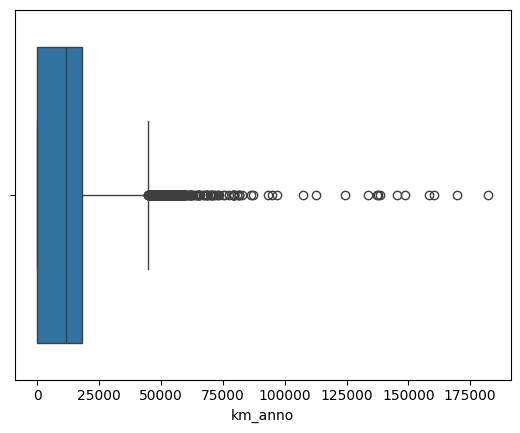

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['km_anno'])
plt.show()


**Mas_1_coche**

Análisis descriptivo

In [82]:
df['Mas_1_coche'].value_counts(normalize=True) * 100  # Porcentaje de cada categoría

Mas_1_coche
False    70.767132
True     29.232868
Name: proportion, dtype: float64

In [83]:
df['Mas_1_coche'] = df['Mas_1_coche'].astype(int)  # Convierte True/False a 1/0 si es necesario

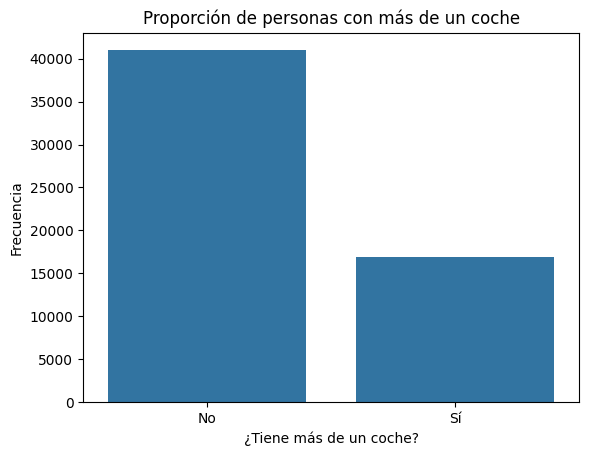

In [84]:
sns.countplot(x=df['Mas_1_coche'])
plt.xlabel("¿Tiene más de un coche?")
plt.ylabel("Frecuencia")
plt.xticks([0,1], ["No", "Sí"])
plt.title("Proporción de personas con más de un coche")
plt.show()


**Revisiones**

In [89]:
df['Revisiones'].unique()  # Lista de valores únicos
df['Revisiones'].value_counts()  # Frecuencia de cada valor

Revisiones
2     12467
1     10532
4      8769
7      5978
3      4342
0      3947
5      3808
6      3480
9      2261
8      2129
10      120
11       52
12       11
13        8
Name: count, dtype: int64

In [ ]:
df['Revisiones'].describe()  # Estadísticas básicas 

count    57904.000000
mean         3.535559
std          2.527840
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max         13.000000
Name: Revisiones, dtype: float64

Media = 3.53 → En promedio, los coches tienen alrededor de 3-4 revisiones.

Mínimo = 0 → Algunos coches no tienen ninguna revisión registrada.

Máximo = 13 → Hay coches con hasta 13 revisiones.

Distribución: La mayoría tiene entre 1 y 5 revisiones, pero hay algunos valores más altos (posibles outliers).

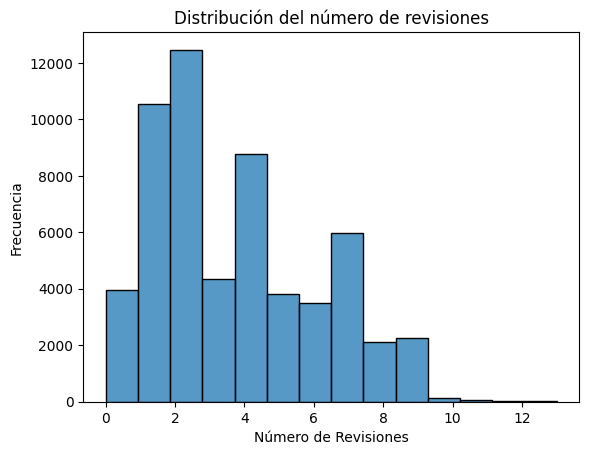

In [92]:
# Histograma
sns.histplot(df['Revisiones'], bins=14, kde=False)
plt.xlabel("Número de Revisiones")
plt.ylabel("Frecuencia")
plt.title("Distribución del número de revisiones")
plt.show()

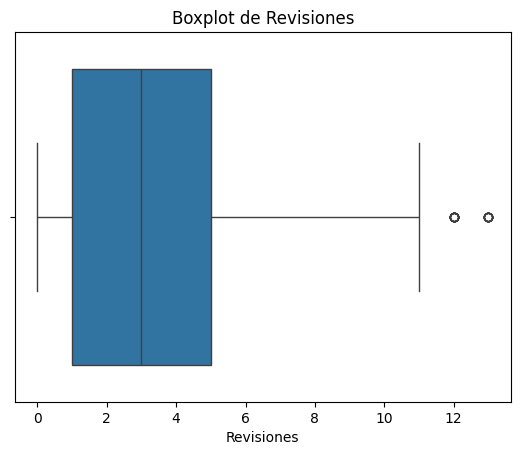

In [93]:
# Boxplot para ver outliers
sns.boxplot(x=df['Revisiones'])
plt.title("Boxplot de Revisiones")
plt.show()

**Edad_Cliente**

In [96]:
df['Edad_Cliente'].nunique()  # Número de valores únicos
df['Edad_Cliente'].value_counts().sort_index()  # Frecuencia de cada edad

Edad_Cliente
18     161
19     164
20     182
21     482
22     533
23     518
24     482
25     517
26     490
27     465
28     474
29     471
30     515
31     522
32     522
33     317
34     326
35     317
36     319
37    1822
38    1850
39    1823
40    1763
41    1850
42    1845
43    1863
44    1763
45    1877
46    1871
47    1794
48    1877
49    1764
50    1819
51    1823
52    1792
53    1822
54    1832
55    1768
56    1777
57    1860
58    1713
59    1879
60    1799
61    1781
62    1795
63     331
64     298
65     322
66     300
67     363
68     326
69     331
70     320
71     314
Name: count, dtype: int64

In [97]:
df['Edad_Cliente'].describe()  # Estadísticas básicas

count    57904.000000
mean        47.362255
std         11.225932
min         18.000000
25%         40.000000
50%         48.000000
75%         56.000000
max         71.000000
Name: Edad_Cliente, dtype: float64

Resumen de las edades:

Media = 47.36 años → La edad promedio de los clientes está en los 40s y 50s.

Mínimo = 18 años → No hay edades menores de 18 (lo cual es bueno).

Máximo = 71 años → No hay valores absurdos (ej. 120 años), así que parece correcto.

Mediana = 48 años → La mitad de los clientes tiene menos de 48 años.

Percentiles:

25% = 40 años

75% = 56 años

Distribución bastante centrada en adultos de mediana edad.

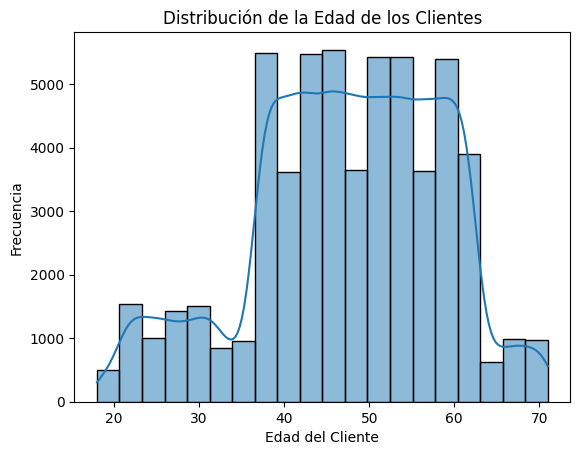

In [98]:
# Histograma
sns.histplot(df['Edad_Cliente'], bins=20, kde=True)
plt.xlabel("Edad del Cliente")
plt.ylabel("Frecuencia")
plt.title("Distribución de la Edad de los Clientes")
plt.show()


La mayor cantidad de clientes está en los 30s, 40s y 50s.

Hay menos clientes jóvenes (18-29 años) y mayores de 65 años.

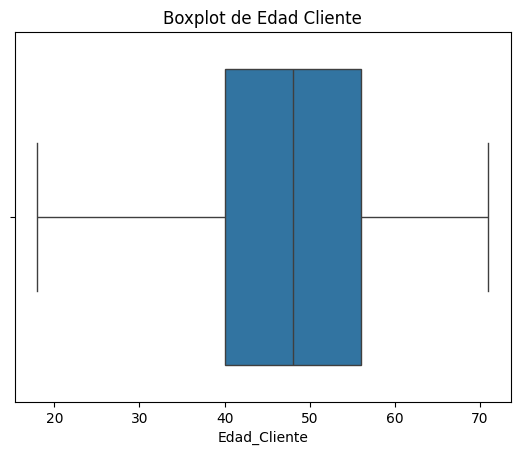

In [99]:
sns.boxplot(x=df['Edad_Cliente'])
plt.title("Boxplot de Edad Cliente")
plt.show()

**Tiempo**

In [101]:
df['Tiempo'].nunique()  # Cantidad de valores únicos
df['Tiempo'].unique()   # Valores únicos
df['Tiempo'].value_counts()  # Frecuencia de cada valor

Tiempo
0     40977
6      3338
7      2766
5      2379
8      2280
4      2046
9      1639
10     1116
3      1072
2       247
11       27
12        7
13        5
14        5
Name: count, dtype: int64